### Problem Statement

The e-commerce industry has revolutionized the way people shop, with customers placing orders directly from websites rather than relying on physical stores. Companies like Amazon, Flipkart, and Myntra have set high standards in this space by offering personalized shopping experiences through advanced recommendation systems.

Ebuss, a growing e-commerce company, operates across various categories, including household essentials, books, personal care, medicines, beauty products, appliances, kitchenware, and healthcare products. To compete with established leaders and capture a larger market share, Ebuss seeks to enhance its recommendation system by integrating sentiment analysis into the process.

As a senior Machine Learning Engineer, our task is to develop and deploy a **Sentiment-Based Product Recommendation System** that analyzes customer reviews and ratings to provide personalized and accurate recommendations, ultimately improving customer satisfaction and engagement.


### Project Objectives:

1. **Sentiment Analysis**: Derive customer sentiments from reviews to enrich the recommendation logic.
2. **Collaborative Filtering**: Develop and assess both **User-Based** and **Item-Based Collaborative Filtering** models.
3. **Hybrid Integration**: Merge collaborative filtering with sentiment insights for improved recommendations.
4. **Deployment**: Deliver a production-ready web application hosted on the cloud for real-time usage.


### Detailed Workflow:

#### **1. Data Exploration and Analysis**
- Import and investigate datasets containing user ratings, reviews, and product metadata.
- Conduct exploratory data analysis (EDA) to uncover trends, spot anomalies, and understand data distribution.

#### **2. Data Cleaning**
- Eliminate duplicates, address missing data, and remove irrelevant entries.
- Unify data formats (e.g., product IDs, timestamps).
- Clean and standardize text fields for consistency.

#### **3. Text Preprocessing**
- Prepare textual reviews for sentiment modeling through:
  - Lowercasing, punctuation and stopword removal.
  - Tokenization and lemmatization of text data.

#### **4. Feature Engineering**
- Convert processed text into numerical representations using:
  - Techniques like **TF-IDF**, **Bag-of-Words**, or **Word Embeddings** (e.g., Word2Vec).

#### **5. Sentiment Classification**
- Train models such as Logistic Regression, Random Forest, or deep learning models to classify review sentiments.
- Evaluate using metrics such as accuracy, recall, precision, and F1-score.

#### **6. Recommendation Engine Development**
- Implement two collaborative filtering approaches:
  - **User-Based Filtering**: Recommend products liked by similar users.
  - **Item-Based Filtering**: Suggest products similar to those previously liked.
- Compare both models using performance indicators like **Root Mean Squared Error (RMSE)**.

#### **7. Sentiment-Augmented Recommendations**
- Integrate sentiment predictions to refine recommendations:
  - Favor items with higher positive sentiment scores.
  - Adjust the ranking of recommended items based on both sentiment and similarity scores.

#### **8. System Evaluation**
- Measure how well the combined model aligns with real user preferences.
- Analyze the improvement in recommendation quality after sentiment integration.

#### **9. Flask Web Application**
- Develop a Flask-based web interface:
  - Set up API routes for generating recommendations.
  - Design a clean user interface for input and output interaction.

### Final Deliverables

1. **Trained Machine Learning Models** for sentiment and recommendations.
2. **Serialized Model Artifacts** (Pickle files) for efficient deployment.
3. **Flask-Based Web Application** to serve recommendations.
4. **Live Deployment** on DigitalOcean, accessible to users via a web interface.


### Expected Outcome

The end result will be a robust and intelligent recommendation system tailored to user sentiments, delivering precise, engaging, and user-centric suggestions. This will elevate the customer experience on Ebuss and position the company more competitively within the digital marketplace.

In [1]:
# Importing the required library to mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the required libraries

# Data Structures
import numpy as np
import pandas as pd
import string

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

# Word cloud
from wordcloud import WordCloud

# ML Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,f1_score,precision_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
import xgboost as xgb

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# Importing necessary libraries for text cleaning and natural language processing
import nltk
from nltk.stem import PorterStemmer  # For stemming words
from nltk.stem import WordNetLemmatizer  # For lemmatizing words
from nltk.corpus import stopwords  # Stopwords corpus from NLTK
import unicodedata  # For working with Unicode characters
from nltk.tokenize import word_tokenize, sent_tokenize , regexp_tokenize  # For tokenization
import re  # For regular expression operations
import html  # For handling HTML entities in text
import spacy
nlp = spacy.load("en_core_web_sm")

# Importing the 'Counter' class from the collections module
from collections import Counter

# Importing the 'SMOTE' (Synthetic Minority Over-sampling Technsent_tokenizeique) from imbalanced-learn library
from imblearn.over_sampling import SMOTE

# Pickle
import pickle

# OS
import os

# Time
import time
from datetime import datetime

In [3]:
# Setting the maximum column width for pandas DataFrames to 500 characters.
pd.set_option('max_colwidth', 500)

In [4]:
# Define the path to the datatset in the drive
mydrive_path='drive/MyDrive/AI_ML_DS/Capstone/GIT_Repo'

In [5]:
# Reading the CSV file from the specified path ('mydrive_path') and loading it into a DataFrame.
master_df = pd.read_csv(mydrive_path + '/data/sample30.csv')

# Creating a copy of the original DataFrame to work with (avoiding modifying the original dataset directly).
df = master_df.copy()

# Displaying a random sample of 5 rows from the DataFrame to inspect a small subset of the data.
df.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
7567,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-03T00:00:00.000Z,False,True,4,These wipes are handy to use when you need to do a quick clean-up. My kids sneeze everywhere and I feel better knowing that the Clorox wipes will kill the germs. This review was collected as part of a promotion.,Go away germs,NaN,NaN,coolduds01,Positive
2822,AVpe59io1cnluZ0-ZgDU,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies & TV,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & Music,Instawatch,Blu-ray",Universal,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),2017-07-19T00:00:00.000Z,NaN,True,4,"I loved the first movie, so of course I had to see the 2nd movie. It's not as good as the first, but it still had laughs and a good movie to watch.",Funny movie,NaN,NaN,jek77,Positive
23030,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys",Test,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,2016-02-06T00:00:00.000Z,NaN,False,3,Not the best movie but had some action scenes but probably will collect dust on my shelf and not watch more than once,Just okay movie,NaN,NaN,tawny,Positive
8895,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-27T19:17:44.000Z,NaN,True,5,This product is very refreshing and is easy to use. This review was collected as part of a promotion.,Great Product,Houston,NaN,mrsmack,Positive
15227,AVpf4oLxLJeJML43FcxC,Avery,"Office,Office Supplies,Office Organization,Binders and Accessories,All Binders,School & Office Supplies,Filing,File Dividers,Dividers",Avery Dennison,"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",2012-09-25T00:00:00.000Z,False,True,5,This is an excellent product. I use it at work to organize daily and weekly logs. Easy to update table of contenets when needed. Very sturdy tabs and ring holes. Great product at a great price.,Excellent!!,NaN,NaN,sueq7,Positive


In [6]:
# Check the number of rows and columns in the dataset
df.shape

(30000, 15)

## 1.Exploratory Data Analysis

In [ ]:
# Info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [ ]:
# Review stats

print("Total reviews_text:")
display(df['reviews_text'].describe())
print("="*100)

print("Unique reviewers:")
display(df['reviews_username'].describe())
print("="*100)

reviewer_prop = df['reviews_username'].nunique() / len(df['reviews_text'])
print("Reviewer ratio:", round(reviewer_prop, 3))
print("="*100)

print("Avg. rating:")
display(df['reviews_rating'].describe())

Total reviews_text:


,reviews_text
count,30000
unique,27282
top,Good
freq,16


Unique reviewers:


,reviews_username
count,29937
unique,24914
top,byamazon customer
freq,41


Reviewer ratio: 0.83
Avg. rating:


,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# Data overview
print("Total rows:", df.shape[0])
print("Total columns:", df.shape[1])
print("\nColumn names:", df.columns.to_list())
print("\nMissing entries:", df.isnull().values.sum())
print("\nUnique values per column:\n", df.nunique())

Total rows: 30000
Total columns: 15

Column names: ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

Missing entries: 74980

Unique values per column:
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


In [ ]:
# Check NULL values
df.isnull().sum()

,0
id,0
brand,0
categories,0
manufacturer,141
name,0
reviews_date,46
reviews_didPurchase,14068
reviews_doRecommend,2570
reviews_rating,0
reviews_text,0


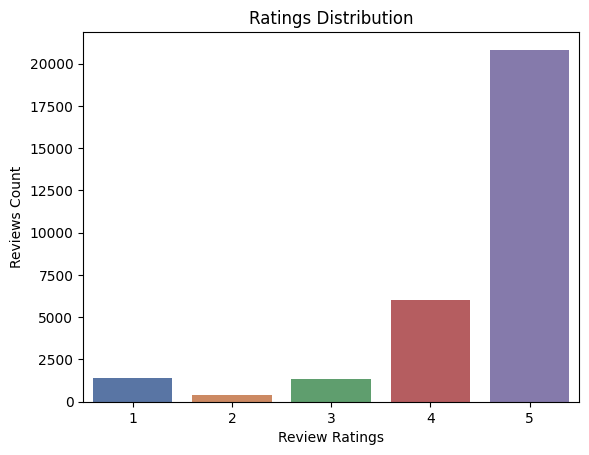

In [ ]:
# 📊 Ratings Frequency Plot
sns.countplot(data=df, x='reviews_rating', order=sorted(df['reviews_rating'].value_counts().index), palette='deep')
plt.title('Ratings Distribution')
plt.xlabel('Review Ratings')
plt.ylabel('Reviews Count')
plt.show()

In [ ]:
df['reviews_didPurchase'].value_counts()

,count
reviews_didPurchase,
False,14498
True,1434


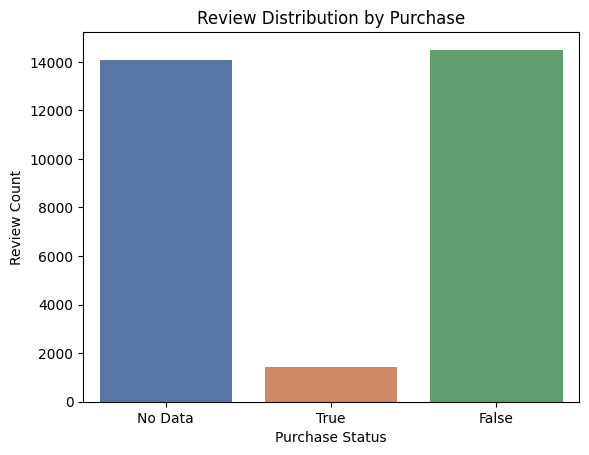

In [ ]:
# Fill missing purchase info with 'No Data'
df['reviews_didPurchase'] = df['reviews_didPurchase'].fillna('No Data')

# Plot purchase distribution to check review imbalance
sns.countplot(data=df, x='reviews_didPurchase', palette='deep')

# Add labels and title
plt.xlabel("Purchase Status")
plt.ylabel("Review Count")
plt.title("Review Distribution by Purchase")
plt.show()

user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64


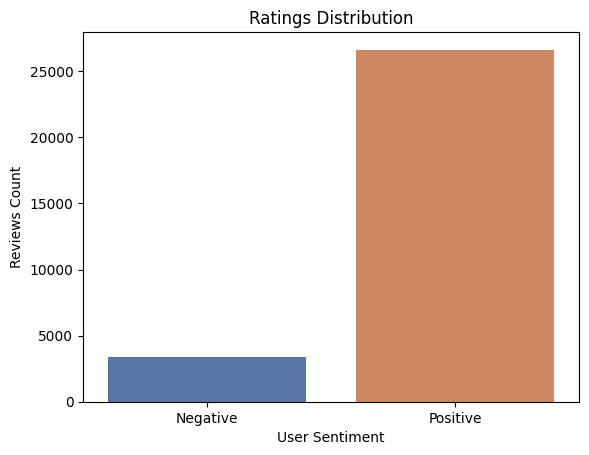

In [ ]:
# Breakdown of sentiment counts in the 'user_sentiment' column
print(df['user_sentiment'].value_counts())

# 📊 Ratings User Sentiment Plot
sns.countplot(data=df, x='user_sentiment', order=sorted(df['user_sentiment'].value_counts().index), palette='deep')
plt.title('Ratings Distribution')
plt.xlabel('User Sentiment')
plt.ylabel('Reviews Count')
plt.show()

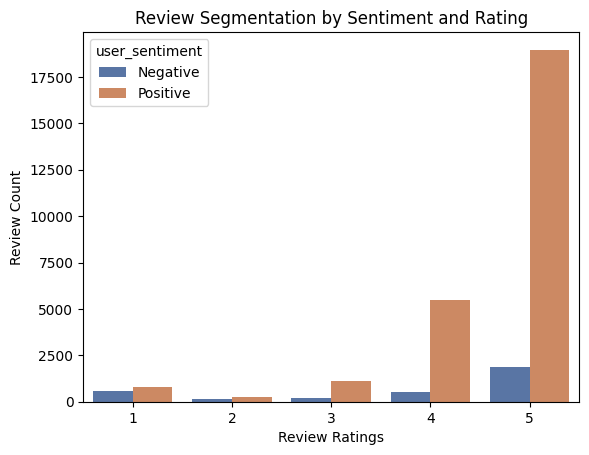

In [ ]:
# Creating a distribution for 'user_sentiment' based on 'reviews_rating'
sns.countplot(data=df, x='reviews_rating', hue='user_sentiment',palette='deep')

plt.xlabel("Review Ratings")
plt.ylabel("Review Count")
plt.title("Review Segmentation by Sentiment and Rating")
plt.show()

**From the above graph we can see that there are some rating in the negative sentiment which should be corrected in the Data Cleaning section**

In [ ]:
# Download the stopwords from the NLTK library
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

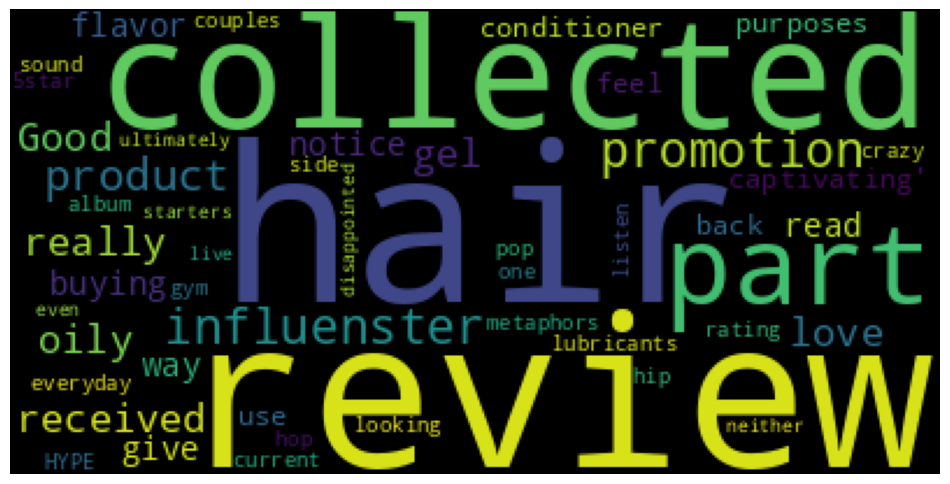

In [ ]:
# To Check the most word occurence using word cloud
stoplist = set(stopwords.words('english'))

wordcloud = WordCloud(stopwords=stoplist,max_words=50).generate(str(df['reviews_text']))

fig = plt.figure(figsize=(12,12))  # Increase the figure size for better clarity
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 2.Data Cleaning

In [7]:
# Finding the number of rows with Null values
df.isnull().sum()

,0
id,0
brand,0
categories,0
manufacturer,141
name,0
reviews_date,46
reviews_didPurchase,14068
reviews_doRecommend,2570
reviews_rating,0
reviews_text,0


In [8]:
round( 100 * df.isnull().mean() , 2 )

,0
id,0.00
brand,0.00
categories,0.00
manufacturer,0.47
name,0.00
reviews_date,0.15
reviews_didPurchase,46.89
reviews_doRecommend,8.57
reviews_rating,0.00
reviews_text,0.00


In [9]:
df[( df['reviews_userCity'].isnull() ) & ( df['reviews_userProvince'].isnull() )].head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive


In [10]:
# From the null values, columns reviews_userCity and reviews_userProvince can be dropped
df = df.drop(columns=['reviews_userCity','reviews_userProvince'],axis=1)
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


In [11]:
# Finding the number of rows with Null values
round( 100 * df.isnull().mean() , 2 ).sort_values(ascending=False)

,0
reviews_didPurchase,46.89
reviews_doRecommend,8.57
reviews_title,0.63
manufacturer,0.47
reviews_username,0.21
reviews_date,0.15
categories,0.00
brand,0.00
id,0.00
name,0.00


In [12]:
# Before Updating the user sentiment columns
df['user_sentiment'].value_counts()

,count
user_sentiment,
Positive,26632
Negative,3367


In [13]:
df[ df['user_sentiment']=='Positive' ]['reviews_rating'].value_counts()

,count
reviews_rating,
5,18970
4,5470
3,1125
1,787
2,280


In [14]:
df[ df['user_sentiment']=='Negative' ]['reviews_rating'].value_counts()

,count
reviews_rating,
5,1860
1,597
4,550
3,220
2,140


In [15]:
# For correcting the user sentiment according to rating
def clean_sentiment_review(x):
    if x >= 3:
        return 'Positive'  # If rating is 3 or greater, return 'Positive'
    elif x > 0 and x < 3:
        return 'Negative'  # If rating is greater than 0 but less than 3, return 'Negative'
    else:
        return 'Neutral'  # Optional: Handle zero ratings (if relevant)

In [16]:
# Assign sentiment labels based on review ratings: Positive, Negative, or Neutral
df['user_sentiment'] = df['reviews_rating'].apply(clean_sentiment_review)

# Show the first few rows to confirm the new 'user_sentiment' column was added correctly
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


In [17]:
# User sentiment after the correction
df['user_sentiment'].value_counts()

,count
user_sentiment,
Positive,28196
Negative,1804


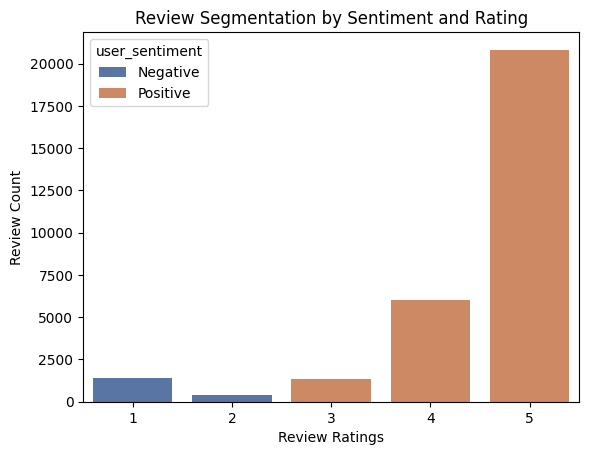

In [18]:
# Creating a distribution for 'user_sentiment' based on 'reviews_rating'
sns.countplot(data=df, x='reviews_rating', hue='user_sentiment',palette='deep')

plt.xlabel("Review Ratings")
plt.ylabel("Review Count")
plt.title("Review Segmentation by Sentiment and Rating")
plt.show()

## 3.Text Processing

In [19]:
nltk.download('punkt')  # For tokenizing text into words and sentences
nltk.download('punkt_tab')
nltk.download('stopwords')  # For removing common stopwords
nltk.download('wordnet')  # For lemmatization
nltk.download('omw-1.4')  # For additional resources for lemmatization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [20]:
# Define the functions needed to perform text processing
def remove_special_characters(text, remove_digits=True):
    """
    Remove special characters (and digits if specified) from text.
    """
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)


def remove_punctuation_and_splchars(words):
    """
    Remove punctuation and special characters from a list of words.
    """
    cleaned = []
    for word in words:
        word = re.sub(r'[^\w\s]', '', word)
        if word:
            word = remove_special_characters(word, True)
            cleaned.append(word)
    return cleaned


def stem_words(words):
    """
    Reduce words to their root form using stemming.
    """
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]


def lemmatize(words):
    """
    Convert words to their base verb form (lemmatize).
    """
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word, pos='v') for word in words]


def normalize(words):
    """
    Clean text by lowering case, removing punctuation, and stopwords.
    """
    words = [word.lower() for word in words]
    words = remove_punctuation_and_splchars(words)
    words = [word for word in words if word not in stopwords.words('english')]
    return words


def normalize_and_lemmaize(input_text):
    """
    Clean and lemmatize input text.
    Steps: remove special characters, tokenize, normalize, and lemmatize.
    """
    # Remove unwanted characters
    input_text = remove_special_characters(input_text)
    # Split into words
    words = word_tokenize(input_text)
    # Clean words (lowercase, remove punctuation and stopwords)
    words = normalize(words)
    # Convert to base form
    lemmas = lemmatize(words)
    # Return cleaned sentence
    return ' '.join(lemmas)


In [21]:
# Take the Review comment and user sentiment as dataframe
review_df = df[['reviews_text','user_sentiment']]
review_df.head()

,reviews_text,user_sentiment
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive
1,Good flavor. This review was collected as part of a promotion.,Positive
2,Good flavor.,Positive
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative


In [22]:
# create a new column lemmatized_review using the emmatize_text function
review_df['lemmatized_text'] = review_df['reviews_text'].map(lambda text: normalize_and_lemmaize(text))

review_df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,reviews_text,user_sentiment,lemmatized_text
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy
1,Good flavor. This review was collected as part of a promotion.,Positive,good flavor review collect part promotion
2,Good flavor.,Positive,good flavor
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel


In [23]:
# Replacing the -PRON- with spaces
review_df['lemmatized_text'] = review_df['lemmatized_text'].str.replace('-PRON-','')
review_df.head()

,reviews_text,user_sentiment,lemmatized_text
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy
1,Good flavor. This review was collected as part of a promotion.,Positive,good flavor review collect part promotion
2,Good flavor.,Positive,good flavor
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel


In [24]:
# Creating a new DataFrame 'review_new_df' containing only the 'lemmatized_text' and 'user_sentiment' columns
review_new_df = review_df[['lemmatized_text', 'user_sentiment']]

# Display newly created DataFrame to view its contents
review_new_df

,lemmatized_text,user_sentiment
0,love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy,Positive
1,good flavor review collect part promotion,Positive
2,good flavor,Positive
3,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess,Negative
4,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel,Negative
...,...,...
29995,get conditioner influenster try im love far oily hair use end hair feel amaze soft mess review collect part promotion,Positive
29996,love receive review purpose influenster leave hair feel fresh smell great,Positive
29997,first love smell product wash hair smooth easy brush receive product influenster test purpose opinions review collect part promotion,Positive
29998,receive influenster never go back anything else normally dont use conditioner hair oily fine make hair feel heavy doesnt get oily day really fantastic plan buy future review collect part promotion,Positive


In [25]:
# Create a full copy of the DataFrame to avoid SettingWithCopyWarning
review_new_df = review_new_df.copy()

# Convert sentiment labels to numeric values for modeling:
# 'Negative' → 0 and 'Positive' → 1
review_new_df['user_sentiment'] = review_new_df['user_sentiment'].map({'Negative': 0, 'Positive': 1})

# Show the first few rows to verify the changes
review_new_df.head()


,lemmatized_text,user_sentiment
0,love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy,1
1,good flavor review collect part promotion,1
2,good flavor,1
3,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess,0
4,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel,0


### Dividing the dataset into train and test data and handle the class imbalance

In [26]:
# Splitting the data into training and testing sets (75% for training and 25% for testing)
x_train, x_test, y_train, y_test = train_test_split(
    review_new_df['lemmatized_text'],  # Features (lemmatized review text)
    review_new_df['user_sentiment'],   # Target variable (user sentiment labels)
    train_size=0.75,
    random_state=42,
    stratify=review_new_df['user_sentiment']  # Preserve the sentiment distribution in both sets
)

# Displaying the distribution of sentiment labels in the training set
# This helps to check the class distribution after the split
y_train.value_counts()

,count
user_sentiment,
1,21147
0,1353


# 4. Feature Engineering

In [ ]:
# Convert text data to a matrix of token counts
count_vect = CountVectorizer()
x_count = count_vect.fit_transform(x_train)

# Convert token counts to TF-IDF scores
tfidf_transformer = TfidfTransformer()
x_train_transformed = tfidf_transformer.fit_transform(x_count)

# Show the shape of the TF-IDF feature matrix (samples × features)
x_train_transformed.shape

(22500, 14831)

In [ ]:
# Define the folder path
folder_path = mydrive_path+'/pickle_files'
os.makedirs(folder_path,exist_ok=True)

# Save the CountVectorizer to a pickle file
with open(mydrive_path + '/pickle_files/count_vector.pkl', 'wb') as f:
    pickle.dump(count_vect, f)

# Save the TfidfTransformer to a pickle file
with open(mydrive_path + '/pickle_files/tfidf_transformer.pkl', 'wb') as f:
    pickle.dump(tfidf_transformer, f)

print("CountVectorizer and TfidfTransformer have been saved to separate pickle files.")

CountVectorizer and TfidfTransformer have been saved to separate pickle files.


In [ ]:
# Checking the distribution of the sentiment labels in the training set before any resampling
count = Counter(y_train)
print('Before sampling:', count)

# Applying SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training set
sampler = SMOTE()

# Resampling the training data (x_train_transformed) and the corresponding sentiment labels (y_train)
x_train_sm, y_train_sm = sampler.fit_resample(x_train_transformed, y_train)

# Checking the distribution of sentiment labels after resampling to confirm balance
count = Counter(y_train_sm)
print('After sampling:', count)

Before sampling: Counter({1: 21147, 0: 1353})
After sampling: Counter({0: 21147, 1: 21147})


# 5. Sentiment Classification

We will train and compare the following models:
 - Logistic Regression
 - Random Forest Classifier
 - Gradient Boosting Classifier
 - Naive Bayes Model
 - XGBClassifier

The best-performing model will be selected after hyperparameter tuning.

In [ ]:
# List to store metrics of multiple models
performance = []

# Function to evaluate and print model performance
def model_metrics(y, y_pred, model_name, metrics):
    # Calculate core metrics
    accuracy = accuracy_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    confusion = confusion_matrix(y, y_pred)

    # Extract values from the confusion matrix
    TP = confusion[1, 1]  # True Positive
    TN = confusion[0, 0]  # True Negative
    FP = confusion[0, 1]  # False Positive
    FN = confusion[1, 0]  # False Negative

    # Calculate sensitivity (recall) and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    # Print evaluation summary
    print("*" * 50)
    print("Confusion Matrix:\n", confusion)
    print(f"Sensitivity of {model_name}: {round(sensitivity, 2)}")
    print(f"Specificity of {model_name}: {round(specificity, 2)}")
    print(f"Accuracy Score of {model_name}: {accuracy}")
    print(f"ROC AUC Score of {model_name}: {roc_auc}")
    print("Classification Report:")
    print(classification_report(y, y_pred))
    print("*" * 50)

    # Save results to the list
    metrics.append({
        'Model_name': model_name,
        'Accuracy': accuracy,
        'Roc_auc_score': roc_auc,
        'Precision': precision,
        'F1_score': f1
    })

    return metrics


### 1. Logistic Regression Model

In [ ]:
# Train Logistic Regression model on the oversampled training data
lr = LogisticRegression(random_state=42)              # Initialize the model
lr.fit(x_train_sm, y_train_sm)        # Fit the model using resampled data

LogisticRegression(random_state=42)

In [ ]:
# We will use the trained Logistic Regression model to make predictions on the resampled training data
y_pred = lr.predict(x_train_sm)

# We will evaluate the model's performance using various metrics through the 'model_metrics' function
# Metrics include accuracy, ROC AUC, precision, F1 score, sensitivity, and specificity
performance = model_metrics(y_train_sm, y_pred, 'Logistic Regression', performance)

**************************************************
Confusion Matrix:
 [[20774   373]
 [  639 20508]]
Sensitivity of Logistic Regression: 0.97
Specificity of Logistic Regression: 0.98
Accuracy Score of Logistic Regression: 0.976072256111978
ROC AUC Score of Logistic Regression: 0.9760722561119779
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     21147
           1       0.98      0.97      0.98     21147

    accuracy                           0.98     42294
   macro avg       0.98      0.98      0.98     42294
weighted avg       0.98      0.98      0.98     42294

**************************************************


### 2. RandomForest Classifier Model

In [ ]:
# We will create a Random Forest Classifier and train it on the resampled training data
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict using the trained Random Forest Classifier model on the resampled training data
y_pred_rf = rf.predict(x_train_sm)

# Evaluate the performance of the Random Forest Classifier model using the 'model_metrics' function
performance = model_metrics(y_train_sm, y_pred_rf, 'RandomForestClassifier', performance)

**************************************************
Confusion Matrix:
 [[21144     3]
 [    0 21147]]
Sensitivity of RandomForestClassifier: 1.0
Specificity of RandomForestClassifier: 1.0
Accuracy Score of RandomForestClassifier: 0.9999290679529012
ROC AUC Score of RandomForestClassifier: 0.999929067952901
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21147
           1       1.00      1.00      1.00     21147

    accuracy                           1.00     42294
   macro avg       1.00      1.00      1.00     42294
weighted avg       1.00      1.00      1.00     42294

**************************************************


### 3. Gradient Bossting Classifier

In [ ]:
# Initialize the GradientBoostingClassifier and fit it on the resampled training data (x_train_sm and y_train_sm)
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(x_train_sm, y_train_sm)

# We will make predictions using the trained Gradient Boosting model on the resampled training data
y_pred_gbc = gbc.predict(x_train_sm)

# Evaluate the performance of the Gradient Boosting Classifier model using the 'model_metrics' function
performance = model_metrics(y_train_sm, y_pred_gbc, 'GradientBoostingClassifier', performance)

**************************************************
Confusion Matrix:
 [[19257  1890]
 [  871 20276]]
Sensitivity of GradientBoostingClassifier: 0.96
Specificity of GradientBoostingClassifier: 0.91
Accuracy Score of GradientBoostingClassifier: 0.9347188726533314
ROC AUC Score of GradientBoostingClassifier: 0.9347188726533314
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     21147
           1       0.91      0.96      0.94     21147

    accuracy                           0.93     42294
   macro avg       0.94      0.93      0.93     42294
weighted avg       0.94      0.93      0.93     42294

**************************************************


### 4. Naive Bayes Model

In [ ]:
# Initializing the Naive Bayes model (MultinomialNB)
mnb = MultinomialNB()

# Fitting the model on the oversampled training data (x_train_sm, y_train_sm)
mnb.fit(x_train_sm, y_train_sm)

# Making predictions on the resampled training data
y_pred_mnb = mnb.predict(x_train_sm)

# Evaluating the performance of the Naive Bayes model using the 'model_metrics' function
# This function calculates various performance metrics like accuracy, ROC AUC, precision, etc.
performance = model_metrics(y_train_sm, y_pred_mnb, 'Naive_Bayes', performance)

**************************************************
Confusion Matrix:
 [[20337   810]
 [ 1652 19495]]
Sensitivity of Naive_Bayes: 0.92
Specificity of Naive_Bayes: 0.96
Accuracy Score of Naive_Bayes: 0.9417884333475197
ROC AUC Score of Naive_Bayes: 0.9417884333475198
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     21147
           1       0.96      0.92      0.94     21147

    accuracy                           0.94     42294
   macro avg       0.94      0.94      0.94     42294
weighted avg       0.94      0.94      0.94     42294

**************************************************


### 5. XGBoostClassifier


In [ ]:
# Initialize the XGBoost classifier and fit it on the resampled training data
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(x_train_sm, y_train_sm)

# Make predictions using the trained XGBoost model
y_pred_xgbc = xgb_classifier.predict(x_train_sm)

# Evaluate the performance of the XGBoost model using the 'model_metrics' function
performance = model_metrics(y_train_sm, y_pred_xgbc, 'XGBClassifier', performance)


**************************************************
Confusion Matrix:
 [[20778   369]
 [  108 21039]]
Sensitivity of XGBClassifier: 0.99
Specificity of XGBClassifier: 0.98
Accuracy Score of XGBClassifier: 0.9887218045112782
ROC AUC Score of XGBClassifier: 0.9887218045112782
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     21147
           1       0.98      0.99      0.99     21147

    accuracy                           0.99     42294
   macro avg       0.99      0.99      0.99     42294
weighted avg       0.99      0.99      0.99     42294

**************************************************


In [ ]:
# Convert the list of model performance metrics into a DataFrame
metrics_df = pd.DataFrame(performance)

# Display the model performance summary
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.976072,0.976072,0.982137,0.975921
1,RandomForestClassifier,0.999929,0.999929,0.999858,0.999929
2,GradientBoostingClassifier,0.934719,0.934719,0.914734,0.936255
3,Naive_Bayes,0.941788,0.941788,0.960108,0.940606
4,XGBClassifier,0.988722,0.988722,0.982763,0.988791


## Hyperparameter Tuning of models

In [ ]:
# Define hyperparameters for tuning using GridSearchCV
n_estimators = [200, 400, 600]           # Number of trees in the forest
max_depth = [6, 10, 15]                  # Maximum depth of each tree
min_samples_leaf = [5, 6, 8]             # Minimum samples required at a leaf node
min_samples_split = [10, 20, 30]         # Minimum samples required to split a node
criterion = ['gini', 'entropy']          # Splitting criteria
C = [0.001, 0.01, 0.1, 1, 10]  # Inverse of regularization strength
penalty = ['l1', 'l2']      # Regularization types
solver = ['liblinear', 'saga', 'lbfgs', 'newton-cg']  # Solver algorithms

### Logistic Regression with tuned hyperparameter

In [ ]:
# Create a dictionary of hyperparameter options for grid search
params = {
    'C': C,
    'penalty': penalty,
    'solver': solver
}

# Perform Grid Search Cross Validation o tune Random Forest hyperparameters
grid_cv = GridSearchCV(
    estimator=lr,
    param_grid=params,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1,
    cv = 3
)

In [ ]:
# Log Start Time
start_time=time.time()
print("Execution Start Time : " , datetime.now())

# Fit the model using GridSearchCV with the resampled training data
grid_cv.fit(x_train_sm, y_train_sm)

# Log End time
end_time = time.time()
print("Execution End Time : " , datetime.now())

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2025-05-30 00:05:38.618991
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Execution End Time :  2025-05-30 00:07:21.187800
Execution time: 102.56877088546753 seconds


In [ ]:
# Retrieve the best Random Forest model from GridSearchCV after hyperparameter tuning
lr_final = grid_cv.best_estimator_
lr_final

LogisticRegression(C=10, random_state=42, solver='newton-cg')

In [ ]:
# Display the best ROC AUC score obtained during GridSearchCV
grid_cv.best_score_

np.float64(0.9971334825874822)

In [ ]:
# Saving the final trained Random Forest model (rf_final) using pickle
pickle.dump(lr_final, open(mydrive_path + '/pickle_files/LR_classifier.pkl', 'wb'))

In [ ]:
# Load best trained Random Forest from previous run
lr_final_path = mydrive_path + '/pickle_files/LR_classifier.pkl'

with open(lr_final_path, 'rb') as f:
    lr_final = pickle.load(f)

# Making predictions using the final trained Random Forest Classifier model (rf_final) after hyperparameter tuning
y_pred_rfgcv = lr_final.predict(x_train_sm)
# Evaluate the tuned Random Forest Classifier model's performance on training data
performance = model_metrics(y_train_sm, y_pred_rfgcv, 'Logistic Regression with hyperparameter', performance)

**************************************************
Confusion Matrix:
 [[21076    71]
 [  221 20926]]
Sensitivity of Logistic Regression with hyperparameter: 0.99
Specificity of Logistic Regression with hyperparameter: 1.0
Accuracy Score of Logistic Regression with hyperparameter: 0.9930959474157091
ROC AUC Score of Logistic Regression with hyperparameter: 0.9930959474157091
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21147
           1       1.00      0.99      0.99     21147

    accuracy                           0.99     42294
   macro avg       0.99      0.99      0.99     42294
weighted avg       0.99      0.99      0.99     42294

**************************************************


### Random Forest with tuned hyperparameter

In [ ]:
# Create a dictionary of hyperparameter options for grid search
params = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'criterion': criterion
}

In [ ]:
# Perform Grid Search Cross Validation o tune Random Forest hyperparameters
grid_cv = GridSearchCV(
    estimator=rf,
    param_grid=params,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1,
    cv = 3
)

In [ ]:
# Log Start Time
start_time=time.time()
print("Execution Start Time : " , datetime.now())

# Fit the model using GridSearchCV with the resampled training data
grid_cv.fit(x_train_sm, y_train_sm)

# Log End time
end_time = time.time()
print("Execution End Time : " , datetime.now())

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2025-05-30 00:07:22.194946
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Execution End Time :  2025-05-30 00:39:10.741173
Execution time: 1908.5462062358856 seconds


In [ ]:
# Retrieve the best Random Forest model from GridSearchCV after hyperparameter tuning
rf_final = grid_cv.best_estimator_
rf_final

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=600,
                       random_state=42)

In [ ]:
# Saving the final trained Random Forest model (rf_final) using pickle
pickle.dump(rf_final, open(mydrive_path + '/pickle_files/RF_classifier.pkl', 'wb'))

In [ ]:
# Display the best ROC AUC score obtained during GridSearchCV
grid_cv.best_score_

np.float64(0.975776268187821)

In [ ]:
# Load best trained Random Forest from previous run
rf_final_path = mydrive_path + '/pickle_files/RF_classifier.pkl'

with open(rf_final_path, 'rb') as f:
    rf_final = pickle.load(f)

# Making predictions using the final trained Random Forest Classifier model (rf_final) after hyperparameter tuning
y_pred_rfgcv = rf_final.predict(x_train_sm)
# Evaluate the tuned Random Forest Classifier model's performance on training data
performance = model_metrics(y_train_sm, y_pred_rfgcv, 'RandomForestClassifier with hyperparameter', performance)

**************************************************
Confusion Matrix:
 [[18015  3132]
 [  618 20529]]
Sensitivity of RandomForestClassifier with hyperparameter: 0.97
Specificity of RandomForestClassifier with hyperparameter: 0.85
Accuracy Score of RandomForestClassifier with hyperparameter: 0.9113349411264009
ROC AUC Score of RandomForestClassifier with hyperparameter: 0.9113349411264009
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     21147
           1       0.87      0.97      0.92     21147

    accuracy                           0.91     42294
   macro avg       0.92      0.91      0.91     42294
weighted avg       0.92      0.91      0.91     42294

**************************************************


### XGBoost Classifier with tuned hyperparameter

In [ ]:
# Create a dictionary of hyperparameter options for grid search
params = {
    'n_estimators': n_estimators,
    'max_depth': max_depth
}

# Perform Grid Search Cross Validation o tune Random Forest hyperparameters
grid_cv = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=params,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1,
    cv = 3
)

In [ ]:
# Log Start Time
start_time=time.time()
print("Execution Start Time : " , datetime.now())

# Fit the model
grid_cv.fit(x_train_sm, y_train_sm)

# Log End time
end_time = time.time()
print("Execution End Time : " , datetime.now())

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution Start Time :  2025-05-30 00:39:15.331778
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Execution End Time :  2025-05-30 01:15:07.691914
Execution time: 2152.360125541687 seconds


In [ ]:
# Retrieve the best Random Forest model from GridSearchCV after hyperparameter tuning
xgb_classifier_final = grid_cv.best_estimator_
xgb_classifier_final

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Display the best ROC AUC score obtained during GridSearchCV
grid_cv.best_score_

np.float64(0.9977672086221222)

In [ ]:
# Saving the final trained Random Forest model (rf_final) using pickle
pickle.dump(xgb_classifier_final, open(mydrive_path + '/pickle_files/XGB_classifier.pkl', 'wb'))

In [ ]:
# Load best trained Random Forest from previous run
xgb_classifier_final_path = mydrive_path + '/pickle_files/XGB_classifier.pkl'

with open(xgb_classifier_final_path, 'rb') as f:
    xgb_classifier_final = pickle.load(f)

# Making predictions using the final trained Random Forest Classifier model (rf_final) after hyperparameter tuning
y_pred = xgb_classifier_final.predict(x_train_sm)
# Evaluate the tuned Random Forest Classifier model's performance on training data
performance = model_metrics(y_train_sm, y_pred, 'XGBoost Classifier with hyperparameter', performance)

**************************************************
Confusion Matrix:
 [[21140     7]
 [    0 21147]]
Sensitivity of XGBoost Classifier with hyperparameter: 1.0
Specificity of XGBoost Classifier with hyperparameter: 1.0
Accuracy Score of XGBoost Classifier with hyperparameter: 0.9998344918901027
ROC AUC Score of XGBoost Classifier with hyperparameter: 0.9998344918901025
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21147
           1       1.00      1.00      1.00     21147

    accuracy                           1.00     42294
   macro avg       1.00      1.00      1.00     42294
weighted avg       1.00      1.00      1.00     42294

**************************************************


### Gradient Boost Classifier with tuned hyperparameter

In [ ]:
# Create a dictionary of hyperparameter options for grid search
params = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

# Perform Grid Search Cross Validation o tune Random Forest hyperparameters
grid_cv = GridSearchCV(
    estimator=gbc,
    param_grid=params,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1,
    cv = 3
)

In [ ]:
# Log Start Time
start_time=time.time()
print("Execution Start Time : " , datetime.now())

# Fit the model
grid_cv.fit(x_train_sm, y_train_sm)

# Log End time
end_time = time.time()
print("Execution End Time : " , datetime.now())

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

In [ ]:
# Retrieve the best Random Forest model from GridSearchCV after hyperparameter tuning
gb_classifier_final = grid_cv.best_estimator_
gb_classifier_final

In [ ]:
# Display the best ROC AUC score obtained during GridSearchCV
grid_cv.best_score_

In [ ]:
# Saving the final trained Random Forest model (rf_final) using pickle
pickle.dump(gb_classifier_final, open(mydrive_path + '/pickle_files/GB_classifier.pkl', 'wb'))

In [ ]:
# Load best trained Random Forest from previous run
gb_classifier_final_path = mydrive_path + '/pickle_files/GB_classifier.pkl'

with open(gb_classifier_final_path, 'rb') as f:
    gb_classifier_final = pickle.load(f)

# Making predictions using the final trained Random Forest Classifier model (rf_final) after hyperparameter tuning
y_pred = gb_classifier_final.predict(x_train_sm)
# Evaluate the tuned Random Forest Classifier model's performance on training data
performance = model_metrics(y_train_sm, y_pred, 'Grad Boost Classifier with hyperparameter', performance)

### Unchecked

In [ ]:
# Fit GridSearchCV for Gradient Boosting and display the best ROC AUC score
# grid_cv_boost.fit(x_train_sm, y_train_sm)

# Import packages
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import time

# Define the parameter values to test
n_estimators_list = [100, 200, 300]
results = []

# Loop over each parameter value and train
best_score = 0
best_model = None
best_params = {}

for n in n_estimators_list:
    print(f"\nTraining with n_estimators = {n}")

    model = XGBClassifier(
        n_estimators=n,
        use_label_encoder=False,
        eval_metric='auc',
        tree_method='hist',
        n_jobs=-1,
        random_state=42
    )

    start = time.time()
    model.fit(
        x_train_sm, y_train_sm,
        eval_set=[(x_train_sm, y_train_sm)],
        verbose=False
    )
    end = time.time()

    # Predict and score
    y_pred = model.predict_proba(x_train_sm)[:, 1]
    score = roc_auc_score(y_train_sm, y_pred)
    print(f"ROC AUC: {score:.4f} (trained in {end - start:.1f}s)")

    # Save result
    results.append({'n_estimators': n, 'roc_auc': score})

    # Track best model
    if score > best_score:
        best_score = score
        best_model = model
        best_params = {'n_estimators': n}

print('Best score for GradientBoosting =', best_score)


Training with n_estimators = 100
ROC AUC: 0.9994 (trained in 29.1s)

Training with n_estimators = 200
ROC AUC: 0.9998 (trained in 49.3s)

Training with n_estimators = 300
ROC AUC: 1.0000 (trained in 67.9s)
Best score for GradientBoosting = 0.9999516285500917


In [ ]:
xgb_final=best_model

# Saving the final trained Gradient Boosting model (rf_final) using pickle
pickle.dump(best_model, open(mydrive_path + '/checkpoints/xgb_best_model.pkl', 'wb'))

In [ ]:
# Evaluate the final tuned Gradient Boosting Classifier on the training data
# Make predictions using the tuned Gradient Boosting model
y_pred_xgbgcv = xgb_final.predict(x_train_sm)

# Evaluate model performance using key metrics
performance = model_metrics(
    y_train_sm,
    y_pred_xgbgcv,
    'GradientBoostingClassifier with n = 600',
    performance
)

**************************************************
Confusion Matrix:
 [[21034   113]
 [   10 21137]]
Sensitivity of GradientBoostingClassifier with n = 600: 1.0
Specificity of GradientBoostingClassifier with n = 600: 0.99
Accuracy Score of GradientBoostingClassifier with n = 600: 0.997091786068946
ROC AUC Score of GradientBoostingClassifier with n = 600: 0.9970917860689459
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     21147
           1       0.99      1.00      1.00     21147

    accuracy                           1.00     42294
   macro avg       1.00      1.00      1.00     42294
weighted avg       1.00      1.00      1.00     42294

**************************************************


In [ ]:
# Perform Grid Search to tune 'max_depth' for the final trained XGBoost model

max_depth = [5, 6, 7, 10]
params_2 = {'max_depth': max_depth}

grid_cv_boost2 = GridSearchCV(
    estimator=xgb_final,
    param_grid=params_2,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1,
    cv=3,                     # Reduce cross-validation folds to speed up
    refit=False               # Prevent the model from being refitted after the grid search
)

In [ ]:
# Fit GridSearchCV to optimize 'max_depth' for the XGBoost model
grid_cv_boost2.fit(x_train_sm, y_train_sm)

# Print the best ROC AUC score found during the grid search
print('Best score for GradientBoosting =', grid_cv_boost2.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best score for GradientBoosting = 0.9974519573156183


In [ ]:
best_params = grid_cv_boost2.best_params_
xgb_best = xgb_final.set_params(**best_params)
print(xgb_best)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)


In [ ]:
# Extract best parameters from the previous grid search
best_params_depth = grid_cv_boost2.best_params_

# Update the base model (xgb_final) with these best parameters
updated_model = xgb_final.set_params(**best_params_depth)

#  Define the new parameter grid to tune 'min_samples_split'
min_samples_split = [10, 20, 30]
params_2 = {'min_samples_split': min_samples_split}

# Create a new GridSearchCV using the updated model
grid_cv_boost3 = GridSearchCV(
    estimator=updated_model,
    param_grid=params_2,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1,
    cv=3                 # Reduce cross-validation folds to speed up
)

# Fit the model
grid_cv_boost3.fit(x_train_sm, y_train_sm)

print('Best score for GradientBoosting =', grid_cv_boost3.best_score_)
print('Best params:', grid_cv_boost3.best_params_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best score for GradientBoosting = 0.9974519573156183
Best params: {'min_samples_split': 10}


In [ ]:
# Creating and displaying a DataFrame with performance metrics for all evaluated models
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,RandomForestClassifier with hyperparameter,0.909491,0.909491,0.865179,0.914668
1,GradientBoostingClassifier,0.936941,0.936941,0.918100,0.938331
2,RandomForestClassifier,0.999929,0.999929,0.999953,0.999929
3,Naive_Bayes,0.943751,0.943751,0.960949,0.942682
4,XGBClassifier,0.989006,0.989006,0.983812,0.989064
5,GradientBoostingClassifier with n = 600,0.997092,0.997092,0.994682,0.997099


In [ ]:
rf_final = pickle.load(open(mydrive_path+'/pickle_files/RandomForest_classifier.pkl','rb'))

In [ ]:
# Defining the final Gradient Boosting Classifier model with the optimal hyperparameters
final_model = GradientBoostingClassifier(
    max_depth=10,
    min_samples_split=20,
    n_estimators=600
)

In [ ]:
final_model.fit(x_train_sm,y_train_sm)

GradientBoostingClassifier(max_depth=10, min_samples_split=20, n_estimators=600)

In [ ]:
# Saving the final trained model to a file using pickle
pickle.dump(final_model, open(mydrive_path + '/pickle_files/final_model.pkl', 'wb'))

### Evaluation on Test

In [ ]:
# Evaluate the performance of all trained models on the test data

# Initialize an empty list to store the performance of each model on the test data
test_performance = []

# Transform the test data using the trained vectorizer and TF-IDF transformer
test_word_vect = count_vect.transform(x_test)
test_tfidf_vect = tfidf_transformer.transform(test_word_vect)

# Predict and evaluate the performance of Tuned Logistic Regression on the test data
model_path = mydrive_path + '/pickle_files/LR_classifier.pkl'
with open(model_path, 'rb') as f:
    model = pickle.load(f)
y_test_pred = model.predict(test_tfidf_vect)
test_performance = model_metrics(y_test, y_test_pred, 'Tuned Logistic Regression', test_performance)

# Predict and evaluate the performance of the Tuned RandomForestClassifier on the test data
model_path = mydrive_path + '/pickle_files/RF_classifier.pkl'
with open(model_path, 'rb') as f:
    model = pickle.load(f)
y_test_pred = model.predict(test_tfidf_vect)
test_performance = model_metrics(y_test, y_test_pred, 'Tuned RandomForestClassifier', test_performance)

# Predict and evaluate the performance of Tuned XGBoost Classifier on the test data
model_path = mydrive_path + '/pickle_files/XGB_classifier.pkl'
with open(model_path, 'rb') as f:
    model = pickle.load(f)
y_test_pred = model.predict(test_tfidf_vect)
test_performance = model_metrics(y_test, y_test_pred, 'Tuned XGBoost Classifier', test_performance)

# Predict and evaluate the performance of the Tuned GradientBoostingClassifier on the test data
model_path = mydrive_path + '/pickle_files/XGB_classifier.pkl'
with open(model_path, 'rb') as f:
    model = pickle.load(f)
y_test_pred = model.predict(test_tfidf_vect)
test_performance = model_metrics(y_test, y_test_pred, 'Tuned GradientBoostClassifier', test_performance)

# Create a DataFrame to display the performance metrics for all models on the test data
test_metrics_df = pd.DataFrame(test_performance)

# Display the performance metrics
test_metrics_df

**************************************************
Confusion Matrix:
 [[ 340  111]
 [ 224 6825]]
Sensitivity of Tuned Logistic Regression: 0.97
Specificity of Tuned Logistic Regression: 0.75
Accuracy Score of Tuned Logistic Regression: 0.9553333333333334
ROC AUC Score of Tuned Logistic Regression: 0.8610513544875451
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67       451
           1       0.98      0.97      0.98      7049

    accuracy                           0.96      7500
   macro avg       0.79      0.86      0.82      7500
weighted avg       0.96      0.96      0.96      7500

**************************************************
**************************************************
Confusion Matrix:
 [[ 269  182]
 [ 250 6799]]
Sensitivity of Tuned RandomForestClassifier: 0.96
Specificity of Tuned RandomForestClassifier: 0.6
Accuracy Score of Tuned RandomForestClassifier: 0.9424
ROC AUC Score of Tuned RandomF

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Tuned Logistic Regression,0.955333,0.861051,0.983997,0.976046
1,Tuned RandomForestClassifier,0.942400,0.780493,0.973929,0.969209
2,Tuned XGBoost Classifier,0.971733,0.831381,0.979251,0.985051
3,Tuned GradientBoostClassifier,0.971733,0.831381,0.979251,0.985051


### **Conclusion:**
- **Logistic Regression** stands out as the top model based on several key metrics such as **ROC AUC**, **accuracy**, and **precision**, making it the optimal choice for this dataset. Its simplicity and interpretability further enhance its appeal.
- While **XGBoost** and **Gradient Bossting** offer strong predictive capabilities, their complexity and risk of overfitting make **Logistic Regression** a more dependable and efficient model in this case.

Given **Logistic Regression**’s consistent performance, it is the preferred model for deployment or further refinement.

In [ ]:
# Load best trained Random Forest from previous run
model_path = mydrive_path + '/pickle_files/LR_classifier.pkl'

with open(model_path, 'rb') as f:
    model = pickle.load(f)

# Saving the trained Logistic Regression model to a pickle file for future use
pickle.dump(model, open(mydrive_path + '/pickle_files/model.pkl', 'wb'))

# 6. Recommendation Engine

In [27]:
# Read the dataset and display a random sample of 5 rows
df = pd.read_csv(mydrive_path + '/data/sample30.csv')
df.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
8734,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-23T12:59:21.000Z,NaN,True,5,I love using Clorox for quick cleaning wipe downs! This review was collected as part of a promotion.,Clorox Disinfecting Wipes,NaN,NaN,jajill,Positive
6771,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-18T15:36:17.000Z,NaN,True,4,It is easy to use over your head cleaning fans or anything. You do not have to worry about spraying getting on your clothes. This review was collected as part of a promotion.,Thank You!,Jacksonville,NaN,reset,Positive
8000,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2012-02-03T14:53:29.000Z,NaN,True,5,These wipes are very quick and simple to use and they smell great!,I Love These!,NaN,NaN,heahert,Positive
13457,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2012-01-26T00:00:00.000Z,False,True,5,"I live with 3 boys and can't live without these. From cleaning the counter to the toilet, I always have these handy. I love that they are thick and durable!",A must have!!,NaN,NaN,sisi73,Positive
4360,AVpe9W4D1cnluZ0-avf0,Hoover,"Home,Home Appliances,Vacuums & Floor Care,Upright Vacuums,Appliances,Vacuum Bags & Accessories,Storage,Cleaning,Vacuums,Floor Care,Hoover,Featured Shops,College Dorm Living,Brand Shop,Canister Vacuums,Indoor Vacuums,industrial,Vacuum Cleaners & Floor Care",Hoover,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,2013-09-07T00:00:00Z,NaN,NaN,5,This vacuum was recommended to me by a friend. The first time I used it I didn't know what to expect. She told me it was very powerful and she was right. It picked up everything. I believe we made a good investment in purchasing this product.,Totaly satisfied,NaN,NaN,frenchie11

In [28]:
len(df['name'].unique())

271

In [29]:
# Split the dataset into training and testing sets (70% training, 30% testing)
df_train, df_test = train_test_split(df, train_size=0.70, random_state=42)

# Display the shape of the training and testing sets
print('Train shape = ', df_train.shape)
print('Test shape = ', df_test.shape)

Train shape =  (21000, 15)
Test shape =  (9000, 15)


In [30]:
# Create a pivot table to aggregate 'reviews_rating' for each 'reviews_username' and 'name'
train_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',
                            data=df_train).fillna(1)

# Display the resulting pivot table
train_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [31]:
# Creating the train dataset for prediction and evaluation
train_pivot1 = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating', data=df_train).fillna(1)

In [32]:
train_pivot1.loc['piggyboy420'].head()

,piggyboy420
name,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0
100:Complete First Season (blu-Ray),1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",1.0


In [33]:
def cosine_similarity(df):
    """
    Calculates adjusted cosine similarity between users.
    """
    mean_df = np.nanmean(df, axis=1)
    substracted_df = (df.T - mean_df).T
    user_correlation = 1 - pairwise_distances(substracted_df.fillna(0), metric='cosine')
    user_correlation[np.isnan(user_correlation)] = 0
    return user_correlation, substracted_df

In [34]:
# Calculate the user-user similarity matrix using adjusted cosine similarity
user_corr_matrix, normalized_df = cosine_similarity(train_pivot1)

# Display the cosine similarity matrix between users
user_corr_matrix

array([[ 1.        , -0.00396825, -0.00396825, ..., -0.00396825,
        -0.00396825, -0.00396825],
       [-0.00396825,  1.        , -0.00396825, ..., -0.00396825,
        -0.00396825, -0.00396825],
       [-0.00396825, -0.00396825,  1.        , ..., -0.00396825,
        -0.00396825, -0.00396825],
       ...,
       [-0.00396825, -0.00396825, -0.00396825, ...,  1.        ,
        -0.00396825, -0.00396825],
       [-0.00396825, -0.00396825, -0.00396825, ..., -0.00396825,
         1.        ,  1.        ],
       [-0.00396825, -0.00396825, -0.00396825, ..., -0.00396825,
         1.        ,  1.        ]])

In [35]:
normalized_df.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,...,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858
00sab00,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,...,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905
01impala,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,...,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905
02deuce,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,...,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858,-0.011858
0325home,-0.015810,-0.015810,-0.015810,-0.015810,-0.015810,-0.015810,-0.015810,-0.015810,-0.015810,-0.015810,...,-0.015810,-0.015810,-0.015810,-0.015810,-0.015810,-0.015810,-0.015810,-0.015810,-0.015810,-0.015810


In [36]:
user_corr_matrix[user_corr_matrix < 0] = 0
user_corr_matrix.shape

(18213, 18213)

In [37]:
df[df['reviews_username'] == 'zzz1127']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
7256,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-03T00:00:00.000Z,False,True,4,These wipes are very handy for getting your cleaning done quickly. I keep them in the bathroom and use them to wipe down all surface areas for a quick 10 minute cleaning. Keep it up every week and it's that easy to maintain a clean room. This review was collected as part of a promotion.,Handy Wipes for Quick Cleaning,NaN,NaN,zzz1127,Positive


In [40]:
# Using the user correlation matrix to predict ratings
user_pred_ratings = np.dot(user_corr_matrix, train_pivot1.fillna(0))
# Displaying the predicted ratings matrix
user_pred_ratings

array([[  12.72143943,   12.72143943,   12.72143943, ...,   12.72143943,
          12.72143943,   12.72143943],
       [ 401.72131001,  401.72131001,  401.72131001, ...,  407.9710254 ,
         403.99579646,  402.45638202],
       [2081.86294481, 2099.20366253, 2081.86294481, ..., 2093.1240552 ,
        2081.86294481, 2081.86294481],
       ...,
       [ 453.48847299,  459.26833116,  453.48847299, ...,  457.66639051,
         453.48847299,  453.48847299],
       [5371.2101501 , 5377.08338447, 5371.2101501 , ..., 5378.41435722,
        5373.31864174, 5371.2101501 ],
       [5371.2101501 , 5377.08338447, 5371.2101501 , ..., 5378.41435722,
        5373.31864174, 5371.2101501 ]])

In [41]:
user_pred_ratings.shape

(18213, 253)

In [42]:
user_final_rating = np.multiply(user_pred_ratings,train_pivot)
user_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,12.721439,12.721439,12.721439,12.721439,12.721439,12.721439,12.721439,12.721439,12.721439,12.721439,...,12.721439,12.721439,12.721439,12.721439,12.721439,12.721439,12.721439,12.721439,12.721439,12.721439
00sab00,401.721310,401.721310,401.721310,401.721310,401.721310,401.721310,401.721310,401.721310,405.463970,401.721310,...,401.721310,401.721310,401.721310,401.721310,403.218989,401.721310,401.721310,407.971025,403.995796,402.456382
01impala,2081.862945,2099.203663,2081.862945,2081.862945,2081.862945,2081.862945,2081.862945,2081.862945,2089.959992,2081.862945,...,2081.862945,2085.093539,2081.862945,2083.720787,2083.167577,2081.862945,2081.862945,2093.124055,2081.862945,2081.862945
02deuce,2081.862945,2099.203663,2081.862945,2081.862945,2081.862945,2081.862945,2081.862945,2081.862945,2089.959992,2081.862945,...,2081.862945,2085.093539,2081.862945,2083.720787,2083.167577,2081.862945,2081.862945,2093.124055,2081.862945,2081.862945
0325home,5371.210150,5377.083384,5371.210150,5371.210150,5371.210150,5371.210150,5371.210150,5371.210150,5374.726211,5371.210150,...,5371.210150,5371.210150,5371.210150,5373.510369,5371.210150,5371.210150,5371.210150,5378.414357,5373.318642,5371.210150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubb,744.303579,762.528700,744.303579,744.303579,744.303579,744.303579,744.303579,744.303579,746.206911,744.303579,...,744.303579,744.303579,744.303579,744.303579,745.801258,744.303579,744.303579,749.058888,747.126389,745.818413
zulaa118,453.488473,459.268331,453.488473,453.488473,453.488473,453.488473,453.488473,453.488473,457.997442,453.488473,...,453.488473,453.488473,453.488473,455.518111,453.488473,453.488473,453.488473,457.666391,453.488473,453.488473
zuttle,453.488473,459.268331,453.488473,453.488473,453.488473,453.488473,453.488473,453.488473,457.997442,453.488473,...,453.488473,453.488473,453.488473,455.518111,453.488473,453.488473,453.488473,457.666391,453.488473,453.488473


In [43]:
# Save the predicted user-item ratings to a pickle file for reuse
pickle.dump(user_final_rating, open(mydrive_path + '/pickle_files/user_final_rating.pkl', 'wb'))

In [44]:
# Get top 20 highest-rated product recommendations for user 'piggyboy420'
user_final_rating.loc['piggyboy420'].sort_values(ascending=False).head(20)

,piggyboy420
name,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0
100:Complete First Season (blu-Ray),0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0
5302050 15/16 FCT/HOSE ADAPTOR,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0
Alex Cross (dvdvideo),0.0


### Evaluation for user - user recommendation system

In [116]:
# Find users present in both train and test datasets
common = df_test[df_test.reviews_username.isin(df_train.reviews_username)]
# Show the number of common user entries
common.shape

(2010, 15)

In [117]:
common.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
2308,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Comedies,Movies, Music & Books,Comedy,Movies & TV,Ways To Shop Entertainment,Recent Release & 4k Movies Sale,Movies & Music,Holiday Shop",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2016-12-14T00:00:00.000Z,NaN,True,5,I have to admit that I was skeptical about seeing this movie at the theater. However after renting the movie I knew I had made a mistake. This is a very funny movie and I just had to own it so I bought it at Best Buy. You won't regret buying it too!,Awesome movie!,NaN,NaN,iplsports,Positive
22404,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy,"Personal Care,Hair Care,Shampoo,Featured Brands,Health & Beauty,Unilever,Beauty,Shampoo & Conditioner,Shampoos,Hair Care & Styling,Shampoos & Conditioners,Ways To Shop",Clear,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,2016-08-30T00:00:00.000Z,False,False,1,"I use to LOVE Clear... until it changed it's formula. Sadly, the scent is horrible is nothing like the original. I don't know why Clear is not taking the feedback from its consumers - over 50 comments from people who have taken the time to write to you about a product they once loved. I know the average rating was above 4.8 stars... now it is at 2.9. Clear- PLEASE LISTEN TO YOUR CUSTOMERS! We hate this product and want the original back. Until then... Guess I will use something else. :(",Such a waste....!,NaN,NaN,crysv,Negative
11311,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2015-01-03T00:00:00.000Z,False,True,5,Awesome product that cleans everything and I have confidence that it is clean This review was collected as part of a promotion.,Awesome,NaN,NaN,billybob789,Positive
19043,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2015-01-14T00:00:00.000Z,False,True,5,Awesome product! Easy to use. Makes the area clean and smelling fresh. This review was collected as part of a promotion.,Clorox,NaN,NaN,fatz,Positive
9482,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2012-01-28T03:32:46.000Z,NaN,True,5,I use the disinfecting wipes constantly. They are so great to have around the house for the big and small messes.,These Wipes Are Great For Everyday Use.,Georgia,NaN,natalie4717,Positive


In [118]:
user_corr_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [119]:
corr_df = pd.DataFrame(user_corr_matrix)
corr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18203,18204,18205,18206,18207,18208,18209,18210,18211,18212
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [120]:
# Add user names from the normalized ratings index to the correlation DataFrame
corr_df['user_name'] = normalized_df.index

# Set user names as the index for easier access and clarity
corr_df.set_index('user_name', inplace=True)

# View the updated correlation DataFrame
corr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18203,18204,18205,18206,18207,18208,18209,18210,18211,18212
user_name,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [121]:
corr_df.columns = normalized_df.index.tolist()
corr_df.head()

,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zowie,zozo0o,zpalma,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zxjki
user_name,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [122]:
list_name = common.reviews_username.tolist()

corr_df1 = corr_df[corr_df.index.isin(list_name)]
corr_df.shape , corr_df1.shape , common.shape

((18213, 18213), (1684, 18213), (2010, 15))

In [123]:
corr_df1.head()

,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zowie,zozo0o,zpalma,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zxjki
user_name,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1234,0.0,0.0,0.705702,0.705702,0.705702,0.705702,0.0,0.0,0.705702,0.0,...,0.0,0.0,0.0,0.0,0.705702,0.0,0.0,0.0,0.705702,0.705702
143st,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,1.0,0.000000,0.000000
23jen,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,1.000000
4 rooms 1 dog lotsa fur,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [124]:
corr_df2 = corr_df1.T[corr_df1.T.index.isin(list_name)]
corr_df2.head()

user_name,00sab00,1234,143st,23jen,4 rooms 1 dog lotsa fur,4djs,7.87E+11,7inthenest,85lisa,8ellie24,...,yoadrian,yorkielvr,yucky111,yummy,yvonne,zach,zburt5,zebras,zipper,zippy
00sab00,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1234,0.0,1.000000,0.0,0.705702,0.0,0.705702,0.0,0.705702,0.705702,0.705702,...,0.705702,0.705702,0.0,0.0,0.705702,0.0,0.0,0.705702,0.0,0.387485
143st,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.000000
23jen,0.0,0.705702,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000
4 rooms 1 dog lotsa fur,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [125]:
corr_df.shape , corr_df1.shape , corr_df2.shape, common.shape

((18213, 18213), (1684, 18213), (1684, 1684), (2010, 15))

In [126]:
corr_df3 = corr_df2.T
corr_df3.head()

,00sab00,1234,143st,23jen,4 rooms 1 dog lotsa fur,4djs,7.87E+11,7inthenest,85lisa,8ellie24,...,yoadrian,yorkielvr,yucky111,yummy,yvonne,zach,zburt5,zebras,zipper,zippy
user_name,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1234,0.0,1.000000,0.0,0.705702,0.0,0.705702,0.0,0.705702,0.705702,0.705702,...,0.705702,0.705702,0.0,0.0,0.705702,0.0,0.0,0.705702,0.0,0.387485
143st,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.000000
23jen,0.0,0.705702,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000
4 rooms 1 dog lotsa fur,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [127]:
# Set negative correlation values to 0 to avoid using negative similarity in predictions
corr_df3[corr_df3 < 0] = 0

In [128]:
# Create a pivot table for users common to both train and test sets
common_user_tb = pd.pivot_table(
    data=common,
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

# Display the pivot table
common_user_tb.head()

name,100:Complete First Season (blu-Ray),Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23jen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 rooms 1 dog lotsa fur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
# Predict ratings for common users using dot product of similarity matrix and user-item matrix
# NaNs in the ratings matrix are treated as 0 during prediction
common_user_rating = np.dot(corr_df3, common_user_tb.fillna(0))

# Display predicted ratings for common users
common_user_rating

array([[ 0.65266525,  0.        ,  5.        , ...,  6.87209898,
         0.        ,  0.        ],
       [ 8.4119096 ,  0.        ,  2.48007968, ..., 12.02291427,
         0.        ,  2.40378692],
       [ 3.52851198,  0.        ,  0.        , ...,  4.09757282,
         0.        ,  0.        ],
       ...,
       [ 3.52851198,  0.        ,  0.        , ...,  5.65337977,
         0.        ,  0.        ],
       [ 3.52851198,  0.        ,  0.        , ...,  4.09757282,
         0.        ,  0.        ],
       [ 4.61553489,  0.        ,  1.93742432, ...,  6.18679068,
         0.        ,  1.87760035]])

In [130]:
# Convert ratings for common users into binary format:
# Ratings >= 1 become 1 (positive feedback), else 0 (negative or no feedback)
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x >= 1 else 0)

# Create a pivot table of binary ratings (0/1) with users as rows and products as columns
dummy_test = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',
                            data=dummy_test).fillna(0)

# Display the binary user-item matrix
dummy_test.head()

name,100:Complete First Season (blu-Ray),Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23jen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 rooms 1 dog lotsa fur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
# Mask predicted ratings using actual test interactions:
# Only retain predicted ratings for items where the user has provided a rating (interaction).
common_user_pred_ratings = np.multiply(common_user_rating, dummy_test)

# Display the masked predicted ratings matrix for common users
common_user_pred_ratings

name,100:Complete First Season (blu-Ray),Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23jen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 rooms 1 dog lotsa fur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zburt5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zebras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
# Make a copy of the predicted ratings for common users
X = common_user_pred_ratings.copy()

# Filter out the zero values to focus on the positive predicted ratings (since ratings = 0 are not useful in this case)
X = X[X > 0]

# Initialize a MinMaxScaler to scale the values between the range of 1 and 5 (as typical rating systems use a 1-5 scale)
scaler = MinMaxScaler(feature_range=(1, 5))

# Fit the scaler on the non-zero predicted ratings and transform the data to scale the values
print(scaler.fit(X))

# Apply the scaling transformation to the data
y = scaler.transform(X)

# Display the scaled ratings
print(y)

print(y.shape)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
(1684, 124)


In [133]:
common_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',
                            data=common)
common_pivot

name,100:Complete First Season (blu-Ray),Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23jen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 rooms 1 dog lotsa fur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zburt5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zebras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (np.nansum((common_pivot - y) ** 2) / total_non_nan) ** 0.5
print(rmse)

1.9195704593862322


### Item - Item recommendation system

In [135]:
train_pivot_ii = train_pivot1.T
train_pivot_ii

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zowie,zozo0o,zpalma,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zxjki
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100:Complete First Season (blu-Ray),1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weleda Everon Lip Balm,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Wilton Black Dots Standard Baking Cups,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [136]:
item_corr_matrix, normalized_item_df = cosine_similarity(train_pivot_ii)
item_corr_matrix.shape

(253, 253)

In [137]:
# Predict item-based ratings by computing the dot product of user-item ratings and the item-item similarity matrix.
# Each user's rating for an item is estimated as a weighted sum of their ratings for similar items.

# Transpose the user-item matrix so items are rows and users are columns
# Then multiply with the item-item similarity matrix to get predicted ratings
item_pred_rating = np.dot((train_pivot_ii.fillna(0)).T, item_corr_matrix)

# Clip any negative predicted ratings to 0, since ratings cannot be negative
item_pred_rating[item_pred_rating < 0] = 0

# Display the predicted ratings matrix (users × items)
item_pred_rating

array([[1.18084584, 0.78291631, 0.86734374, ..., 0.73637655, 0.70463656,
        0.83313038],
       [1.17759901, 0.7670132 , 0.86399288, ..., 0.7344469 , 0.7052733 ,
        0.83837984],
       [1.17170286, 0.77955649, 0.85790782, ..., 0.69174089, 0.674552  ,
        0.81096967],
       ...,
       [1.17269169, 0.81055087, 0.85892834, ..., 0.709873  , 0.67780573,
        0.81336641],
       [1.14438564, 0.62310902, 0.82971541, ..., 0.48288246, 0.59539152,
        0.74475837],
       [1.17260802, 0.74726118, 0.85884199, ..., 0.67946063, 0.68021178,
        0.8131636 ]])

In [138]:
#final rating for items
item_final_rating = np.multiply(item_pred_rating,train_pivot)
item_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.180846,0.782916,0.867344,0.886031,0.933622,0.885094,0.933622,0.906158,0.495920,0.973488,...,0.906158,1.007812,0.933622,1.004627,0.999980,0.831699,0.933622,0.736377,0.704637,0.833130
00sab00,1.177599,0.767013,0.863993,0.883153,0.931947,0.882192,0.931947,0.903788,0.505422,0.969762,...,0.903788,1.004939,0.931947,1.000880,1.031723,0.827446,0.931947,0.734447,0.705273,0.838380
01impala,1.171703,0.779556,0.857908,0.877926,0.928905,0.876922,0.928905,0.899486,0.471844,0.962996,...,0.899486,1.047150,0.928905,1.015673,1.001625,0.819722,0.928905,0.691741,0.674552,0.810970
02deuce,1.166547,0.775012,0.852586,0.873355,0.926244,0.872314,0.926244,0.895723,0.456925,0.957079,...,0.895723,1.066302,0.926244,1.020521,1.001545,0.812968,0.926244,0.665118,0.657585,0.798472
0325home,1.144386,0.623109,0.829715,0.853711,0.914810,0.852508,0.914810,0.879552,0.330691,0.931648,...,0.879552,0.975547,0.914810,0.992457,0.943713,0.783938,0.914810,0.482882,0.595392,0.744758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubb,1.172966,0.840143,0.859211,0.879045,0.929556,0.878051,0.929556,0.900407,0.471511,0.964445,...,0.900407,1.000838,0.929556,0.995534,1.028035,0.821376,0.929556,0.701316,0.697582,0.842741
zulaa118,1.172692,0.810551,0.858928,0.878803,0.929415,0.877806,0.929415,0.900207,0.487966,0.964131,...,0.900207,1.000596,0.929415,1.084896,0.987396,0.821017,0.929415,0.709873,0.677806,0.813366
zuttle,1.172692,0.810551,0.858928,0.878803,0.929415,0.877806,0.929415,0.900207,0.487966,0.964131,...,0.900207,1.000596,0.929415,1.084896,0.987396,0.821017,0.929415,0.709873,0.677806,0.813366


In [139]:
# Get top 20 item recommendations for user 'piggyboy420' by sorting predicted ratings in descending order
item_final_rating.loc['piggyboy420'].sort_values(ascending=False).head(20)

,piggyboy420
name,
Various - Country's Greatest Gospel:Gold Ed (cd),2.536007
Naturtint Nutrideep Multiplier Protective Cream,2.398191
Cococare 100% Natural Castor Oil,2.349399
Chips Deluxe Soft 'n Chewy Cookies,2.333186
Kind Nut Delight Bar,2.333186
The Honest Company Laundry Detergent,2.224527
Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel,1.957043
Pink Friday: Roman Reloaded Re-Up (w/dvd),1.880455
"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",1.819307


#### Evaluation for item and item

In [140]:
common_item = df_test[df_test.name.isin(df_train.name)]
common_item.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
2308,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Comedies,Movies, Music & Books,Comedy,Movies & TV,Ways To Shop Entertainment,Recent Release & 4k Movies Sale,Movies & Music,Holiday Shop",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2016-12-14T00:00:00.000Z,NaN,True,5,I have to admit that I was skeptical about seeing this movie at the theater. However after renting the movie I knew I had made a mistake. This is a very funny movie and I just had to own it so I bought it at Best Buy. You won't regret buying it too!,Awesome movie!,NaN,NaN,iplsports,Positive
22404,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy,"Personal Care,Hair Care,Shampoo,Featured Brands,Health & Beauty,Unilever,Beauty,Shampoo & Conditioner,Shampoos,Hair Care & Styling,Shampoos & Conditioners,Ways To Shop",Clear,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,2016-08-30T00:00:00.000Z,False,False,1,"I use to LOVE Clear... until it changed it's formula. Sadly, the scent is horrible is nothing like the original. I don't know why Clear is not taking the feedback from its consumers - over 50 comments from people who have taken the time to write to you about a product they once loved. I know the average rating was above 4.8 stars... now it is at 2.9. Clear- PLEASE LISTEN TO YOUR CUSTOMERS! We hate this product and want the original back. Until then... Guess I will use something else. :(",Such a waste....!,NaN,NaN,crysv,Negative
23397,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys",Test,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,2015-06-24T00:00:00.000Z,NaN,True,4,"I enjoyed this film because just like the old school Japanese versions, Godzilla is actually a good guy. A protector of sorts. The special effects in High Def looks great. I only wish they would've shown the king of the monsters more.",A page from the old school Godzilla,NaN,NaN,sammhc12,Positive
25058,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys",Test,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,2014-09-20T00:00:00.000Z,NaN,True,5,SPECIAL FX ARE JUST WAY OVER THE TOP HAVE ALWAYS LOVED THE OLD MOVIES THE NEW IS NO DISAPPOINTMENT .LOVED IT,awesome fx,NaN,NaN,spyder,Positive
2664,AVpe59io1cnluZ0-ZgDU,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies & TV,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & Music,Instawatch,Blu-ray",Universal,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),2016-07-22T00:00:00.000Z,NaN,True,4,If you liked the first movie you will love the second movie. All the cast have done a wonderful job making us crack up again.,Greeking it up funny,NaN,NaN,melbellz,Positive


In [141]:
# Create a pivot table where rows are items, columns are users, and values are their ratings.
# This layout is useful for item-based collaborative filtering.
common_item_pivot = common_item.pivot_table(index='name',
                                            columns='reviews_username',
                                            values='reviews_rating')

# Display the shape of the pivot table (rows = items, columns = users)
common_item_pivot.shape

(196, 8366)

In [142]:
# Converting the item-item correlation matrix into a DataFrame for better readability and analysis
item_corr_df = pd.DataFrame(item_corr_matrix)

# Displaying the DataFrame to see the item-item correlation values
item_corr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,1.000000,-0.001010,-0.000213,-0.000183,-0.000106,-0.000184,-0.000106,-0.000151,-0.001016,-0.000237,...,-0.000151,-0.000183,-0.000106,-0.000238,-0.000318,-0.000270,-0.000106,-0.001518,-0.000679,-0.000500
1,-0.001010,1.000000,-0.001043,-0.000895,-0.000521,-0.000903,-0.000521,-0.000737,-0.004975,-0.001159,...,-0.000737,-0.000894,-0.000521,-0.001166,-0.001559,-0.001323,-0.000521,-0.005349,-0.003324,-0.002448
2,-0.000213,-0.001043,1.000000,-0.000189,-0.000110,-0.000190,-0.000110,-0.000155,-0.001048,-0.000244,...,-0.000155,-0.000188,-0.000110,-0.000246,-0.000328,-0.000279,-0.000110,-0.001567,-0.000700,-0.000516
3,-0.000183,-0.000895,-0.000189,1.000000,-0.000094,-0.000163,-0.000094,-0.000133,-0.000900,-0.000210,...,-0.000133,-0.000162,-0.000094,-0.000211,-0.000282,-0.000239,-0.000094,-0.001346,-0.000602,-0.000443
4,-0.000106,-0.000521,-0.000110,-0.000094,1.000000,-0.000095,-0.000055,-0.000078,-0.000524,-0.000122,...,-0.000078,-0.000094,-0.000055,-0.000123,-0.000164,-0.000139,-0.000055,-0.000783,-0.000350,-0.000258


In [143]:
# Add item names (from the normalized item ratings index) as a column
item_corr_df['name'] = normalized_item_df.index

# Set item names as the index for better readability of the correlation matrix
item_corr_df.set_index('name', inplace=True)

# Show the final item-item correlation matrix with proper row and column labels
item_corr_df

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001010,-0.000213,-0.000183,-0.000106,-0.000184,-0.000106,-0.000151,-0.001016,-0.000237,...,-0.000151,-0.000183,-0.000106,-0.000238,-0.000318,-0.000270,-0.000106,-0.001518,-0.000679,-0.000500
100:Complete First Season (blu-Ray),-0.001010,1.000000,-0.001043,-0.000895,-0.000521,-0.000903,-0.000521,-0.000737,-0.004975,-0.001159,...,-0.000737,-0.000894,-0.000521,-0.001166,-0.001559,-0.001323,-0.000521,-0.005349,-0.003324,-0.002448
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000213,-0.001043,1.000000,-0.000189,-0.000110,-0.000190,-0.000110,-0.000155,-0.001048,-0.000244,...,-0.000155,-0.000188,-0.000110,-0.000246,-0.000328,-0.000279,-0.000110,-0.001567,-0.000700,-0.000516
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000183,-0.000895,-0.000189,1.000000,-0.000094,-0.000163,-0.000094,-0.000133,-0.000900,-0.000210,...,-0.000133,-0.000162,-0.000094,-0.000211,-0.000282,-0.000239,-0.000094,-0.001346,-0.000602,-0.000443
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",-0.000106,-0.000521,-0.000110,-0.000094,1.000000,-0.000095,-0.000055,-0.000078,-0.000524,-0.000122,...,-0.000078,-0.000094,-0.000055,-0.000123,-0.000164,-0.000139,-0.000055,-0.000783,-0.000350,-0.000258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weleda Everon Lip Balm,-0.000270,-0.001323,-0.000279,-0.000239,-0.000139,-0.000241,-0.000139,-0.000197,-0.001330,-0.000310,...,-0.000197,-0.000239,-0.000139,-0.000312,-0.000417,1.000000,-0.000139,-0.001989,-0.000889,-0.000655
Wilton Black Dots Standard Baking Cups,-0.000106,-0.000521,-0.000110,-0.000094,-0.000055,-0.000095,-0.000055,-0.000078,-0.000524,-0.000122,...,-0.000078,-0.000094,-0.000055,-0.000123,-0.000164,-0.000139,1.000000,-0.000783,-0.000350,-0.000258
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001518,-0.005349,-0.001567,-0.001346,-0.000783,-0.001357,-0.000783,-0.001108,-0.007476,-0.001742,...,-0.001108,-0.001344,-0.000783,-0.001752,-0.002343,-0.001989,-0.000783,1.000000,-0.004996,-0.003680


In [144]:
# Set item names (from normalized item ratings) as column headers in the item correlation DataFrame
item_corr_df.columns = normalized_item_df.index.tolist()

# Display the final item-item correlation matrix with item names as both row and column labels
item_corr_df

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001010,-0.000213,-0.000183,-0.000106,-0.000184,-0.000106,-0.000151,-0.001016,-0.000237,...,-0.000151,-0.000183,-0.000106,-0.000238,-0.000318,-0.000270,-0.000106,-0.001518,-0.000679,-0.000500
100:Complete First Season (blu-Ray),-0.001010,1.000000,-0.001043,-0.000895,-0.000521,-0.000903,-0.000521,-0.000737,-0.004975,-0.001159,...,-0.000737,-0.000894,-0.000521,-0.001166,-0.001559,-0.001323,-0.000521,-0.005349,-0.003324,-0.002448
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000213,-0.001043,1.000000,-0.000189,-0.000110,-0.000190,-0.000110,-0.000155,-0.001048,-0.000244,...,-0.000155,-0.000188,-0.000110,-0.000246,-0.000328,-0.000279,-0.000110,-0.001567,-0.000700,-0.000516
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000183,-0.000895,-0.000189,1.000000,-0.000094,-0.000163,-0.000094,-0.000133,-0.000900,-0.000210,...,-0.000133,-0.000162,-0.000094,-0.000211,-0.000282,-0.000239,-0.000094,-0.001346,-0.000602,-0.000443
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",-0.000106,-0.000521,-0.000110,-0.000094,1.000000,-0.000095,-0.000055,-0.000078,-0.000524,-0.000122,...,-0.000078,-0.000094,-0.000055,-0.000123,-0.000164,-0.000139,-0.000055,-0.000783,-0.000350,-0.000258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weleda Everon Lip Balm,-0.000270,-0.001323,-0.000279,-0.000239,-0.000139,-0.000241,-0.000139,-0.000197,-0.001330,-0.000310,...,-0.000197,-0.000239,-0.000139,-0.000312,-0.000417,1.000000,-0.000139,-0.001989,-0.000889,-0.000655
Wilton Black Dots Standard Baking Cups,-0.000106,-0.000521,-0.000110,-0.000094,-0.000055,-0.000095,-0.000055,-0.000078,-0.000524,-0.000122,...,-0.000078,-0.000094,-0.000055,-0.000123,-0.000164,-0.000139,1.000000,-0.000783,-0.000350,-0.000258
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001518,-0.005349,-0.001567,-0.001346,-0.000783,-0.001357,-0.000783,-0.001108,-0.007476,-0.001742,...,-0.001108,-0.001344,-0.000783,-0.001752,-0.002343,-0.001989,-0.000783,1.000000,-0.004996,-0.003680


In [145]:
# Extract item names from 'common_item' to use as column labels
list_items = common_item.name.tolist()

# Filter the item correlation matrix to retain only items present in 'list_items'
item_corr_df1 = item_corr_df.loc[item_corr_df.index.isin(list_items)]

# Display the filtered correlation matrix
item_corr_df1

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001010,-0.000213,-0.000183,-0.000106,-0.000184,-0.000106,-0.000151,-0.001016,-0.000237,...,-0.000151,-0.000183,-0.000106,-0.000238,-0.000318,-0.000270,-0.000106,-0.001518,-0.000679,-0.000500
100:Complete First Season (blu-Ray),-0.001010,1.000000,-0.001043,-0.000895,-0.000521,-0.000903,-0.000521,-0.000737,-0.004975,-0.001159,...,-0.000737,-0.000894,-0.000521,-0.001166,-0.001559,-0.001323,-0.000521,-0.005349,-0.003324,-0.002448
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000183,-0.000895,-0.000189,1.000000,-0.000094,-0.000163,-0.000094,-0.000133,-0.000900,-0.000210,...,-0.000133,-0.000162,-0.000094,-0.000211,-0.000282,-0.000239,-0.000094,-0.001346,-0.000602,-0.000443
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000184,-0.000903,-0.000190,-0.000163,-0.000095,1.000000,-0.000095,-0.000135,-0.000908,-0.000212,...,-0.000135,-0.000163,-0.000095,-0.000213,-0.000284,-0.000241,-0.000095,-0.001357,-0.000607,-0.000447
Africa's Best No-Lye Dual Conditioning Relaxer System Super,-0.000151,-0.000737,-0.000155,-0.000133,-0.000078,-0.000135,-0.000078,1.000000,-0.000741,-0.000173,...,-0.000110,-0.000133,-0.000078,-0.000174,-0.000232,-0.000197,-0.000078,-0.001108,-0.000495,-0.000365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000318,-0.001559,-0.000328,-0.000282,-0.000164,-0.000284,-0.000164,-0.000232,-0.001567,-0.000365,...,-0.000232,-0.000282,-0.000164,-0.000367,1.000000,-0.000417,-0.000164,-0.002343,-0.001047,-0.000771
Weleda Everon Lip Balm,-0.000270,-0.001323,-0.000279,-0.000239,-0.000139,-0.000241,-0.000139,-0.000197,-0.001330,-0.000310,...,-0.000197,-0.000239,-0.000139,-0.000312,-0.000417,1.000000,-0.000139,-0.001989,-0.000889,-0.000655
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001518,-0.005349,-0.001567,-0.001346,-0.000783,-0.001357,-0.000783,-0.001108,-0.007476,-0.001742,...,-0.001108,-0.001344,-0.000783,-0.001752,-0.002343,-0.001989,-0.000783,1.000000,-0.004996,-0.003680


In [146]:
# Transpose to filter columns based on 'list_items' (items of interest)
item_corr_df2 = item_corr_df1.T[item_corr_df1.T.index.isin(list_items)]

# Transpose back to get the final item-item correlation matrix
item_corr_df3 = item_corr_df2.T

# Display the filtered correlation matrix
item_corr_df3

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001010,-0.000183,-0.000184,-0.000151,-0.001016,-0.000237,-0.000106,-0.000207,-0.000367,...,-0.000817,-0.000940,-0.000758,-0.000151,-0.000238,-0.000318,-0.000270,-0.001518,-0.000679,-0.000500
100:Complete First Season (blu-Ray),-0.001010,1.000000,-0.000895,-0.000903,-0.000737,-0.004975,-0.001159,-0.000521,-0.001012,-0.001798,...,-0.004000,-0.004604,-0.003714,-0.000737,-0.001166,-0.001559,-0.001323,-0.005349,-0.003324,-0.002448
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000183,-0.000895,1.000000,-0.000163,-0.000133,-0.000900,-0.000210,-0.000094,-0.000183,-0.000325,...,-0.000724,-0.000833,-0.000672,-0.000133,-0.000211,-0.000282,-0.000239,-0.001346,-0.000602,-0.000443
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000184,-0.000903,-0.000163,1.000000,-0.000135,-0.000908,-0.000212,-0.000095,-0.000185,-0.000328,...,-0.000730,-0.000840,-0.000678,-0.000135,-0.000213,-0.000284,-0.000241,-0.001357,-0.000607,-0.000447
Africa's Best No-Lye Dual Conditioning Relaxer System Super,-0.000151,-0.000737,-0.000133,-0.000135,1.000000,-0.000741,-0.000173,-0.000078,-0.000151,-0.000268,...,-0.000596,-0.000686,-0.000553,-0.000110,-0.000174,-0.000232,-0.000197,-0.001108,-0.000495,-0.000365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000318,-0.001559,-0.000282,-0.000284,-0.000232,-0.001567,-0.000365,-0.000164,-0.000319,-0.000566,...,-0.001260,-0.001451,-0.001170,-0.000232,-0.000367,1.000000,-0.000417,-0.002343,-0.001047,-0.000771
Weleda Everon Lip Balm,-0.000270,-0.001323,-0.000239,-0.000241,-0.000197,-0.001330,-0.000310,-0.000139,-0.000271,-0.000481,...,-0.001070,-0.001231,-0.000993,-0.000197,-0.000312,-0.000417,1.000000,-0.001989,-0.000889,-0.000655
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001518,-0.005349,-0.001346,-0.001357,-0.001108,-0.007476,-0.001742,-0.000783,-0.001521,-0.002702,...,-0.006012,0.001774,-0.005582,-0.001108,-0.001752,-0.002343,-0.001989,1.000000,-0.004996,-0.003680


In [147]:
# Set all negative similarity values to 0 (since negative similarities aren't useful for prediction)
item_corr_df3[item_corr_df3 < 0] = 0

# Predict ratings by multiplying item similarity matrix with the user-item rating matrix
# Missing ratings are filled with 0 during prediction
common_item_pred_ratings = np.dot(item_corr_df3, common_item_pivot.fillna(0))

# Show the shape of the predicted ratings matrix (items x users)
common_item_pred_ratings.shape

(196, 8366)

In [148]:
# Create a copy of the 'common_item' DataFrame and assign it to a new variable 'test_items'
test_items = common_item.copy()

In [149]:
# Create a pivot table where each row is a user, each column is an item, and values are ratings.
# Missing ratings are filled with 0.
test_item_tb = test_items.pivot_table(index='reviews_username',
                                      columns='name',
                                      values='reviews_rating').T.fillna(0)

# Multiply predicted ratings with actual test ratings to keep predictions only for rated items.
final_item_ratings = np.multiply(common_item_pred_ratings, test_item_tb)

# View the final item-based predicted ratings
final_item_ratings

reviews_username,00sab00,02dakota,1143mom,11677j,1234,1234561,1234asdf,12cass12,12gage,13dani,...,zodness,zoe1988,zoey,zombiejess,zout22389,zsarah,zwithanx,zyiah4,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Weleda Everon Lip Balm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
# Make a copy of the final item ratings matrix
X = final_item_ratings.copy()

# Keep only positive ratings (ignore 0 or negative values)
X = X[X > 0]

# Initialize MinMaxScaler to scale values between 1 and 5
scaler = MinMaxScaler(feature_range=(1, 5))

# Fit the scaler and print the fitted object (optional)
print(scaler.fit(X))

# Transform the ratings to the 1–5 scale
y = scaler.transform(X)

# Show the scaled ratings
print(y)

# Display the shape of the scaled matrix
print(y.shape)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
(196, 8366)


In [151]:
# Count how many values in the predicted matrix are not NaN
total_non_nan = np.count_nonzero(~np.isnan(y))

# Compute RMSE between actual ratings and predicted ratings
rmse = (np.nansum((common_item_pivot - y) ** 2) / total_non_nan) ** 0.5

# Print the RMSE score
print(rmse)

3.5763522017789224


In [157]:
# Save the predicted user-item ratings to a pickle file for reuse
pickle.dump(final_item_ratings, open(mydrive_path + '/pickle_files/item_final_rating.pkl', 'wb'))

In [155]:
final_item_ratings.sample(5)

reviews_username,00sab00,02dakota,1143mom,11677j,1234,1234561,1234asdf,12cass12,12gage,13dani,...,zodness,zoe1988,zoey,zombiejess,zout22389,zsarah,zwithanx,zyiah4,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
J.a. Henckels International 4-Pc Everedge Plus Steak Knife Set,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bisquick Original Pancake And Baking Mix - 40oz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Resident Evil Collection 5 Discs (blu-Ray),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Scooby Doo And The Loch Ness Monster (blu-Ray),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
user_final_rating.sample(5)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
pamiro8487,83.389647,83.389647,83.389647,83.389647,83.389647,83.389647,83.389647,83.389647,83.389647,83.389647,...,83.389647,83.389647,83.389647,83.389647,83.389647,83.389647,83.389647,84.948235,83.389647,83.389647
dmilesjr,744.303579,762.528700,744.303579,744.303579,744.303579,744.303579,744.303579,744.303579,746.206911,744.303579,...,744.303579,744.303579,744.303579,744.303579,745.801258,744.303579,744.303579,749.058888,747.126389,745.818413
kimboooo,5371.210150,5377.083384,5371.210150,5371.210150,5371.210150,5371.210150,5371.210150,5371.210150,5374.726211,5371.210150,...,5371.210150,5371.210150,5371.210150,5373.510369,5371.210150,5371.210150,5371.210150,5378.414357,5373.318642,5371.210150
cierra,401.721310,401.721310,401.721310,401.721310,401.721310,401.721310,401.721310,401.721310,405.463970,401.721310,...,401.721310,401.721310,401.721310,401.721310,403.218989,401.721310,401.721310,407.971025,403.995796,402.456382
steph710,429.155056,429.155056,429.155056,429.155056,429.155056,429.155056,429.155056,429.155056,429.155056,429.155056,...,429.155056,429.155056,429.155056,429.155056,429.155056,429.155056,429.155056,429.155056,429.155056,429.155056


## Final Observation:

 - After testing both User-User and Item-Item Collaborative Filtering methods, the User-User Collaborative Filtering emerged as the superior approach due to its lower Root Mean Squared Error (RMSE). This demonstrates that User-User filtering more effectively captures user preferences, resulting in better personalized recommendations.
 - The system also integrates sentiment analysis to prioritize products with positive reviews, enhancing the relevance and quality of the recommendations. The complete recommendation system is deployed using a Flask app hosted on DigitalOcean, ensuring it is reliable and easily accessible.
 - By focusing on User-User Collaborative Filtering, the model provides more accurate, sentiment-aware, and user-focused recommendations, making it the best fit for this use case.